7214
6536


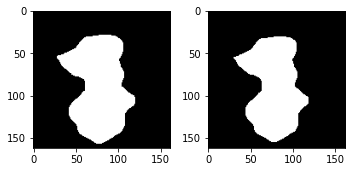

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import morphology
from prep_image import prep_im_and_gt
import math

im, gt = prep_im_and_gt("PAT_1074_322_662", "test_images/", "test_image_groundtruths/", scalar=.25)
#plt.imshow(gt, cmap="gray")

area = np.sum(gt)
#plt.imshow(gt, cmap='gray')

#Structural element, that we will use as a "brush" on our mask
struct_el = morphology.disk(2)

# Use this "brush" to erode the image - eat away at the borders
mask_eroded = morphology.binary_erosion(gt, struct_el)

# Show side by side (depending on brush size, you might not see a difference visually)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(gt, cmap='gray')
axes[1].imshow(mask_eroded, cmap='gray')
fig.tight_layout()

# Verify the new mask is smaller
print(area)
print(np.sum(mask_eroded))

7214 678
5.070763852249433


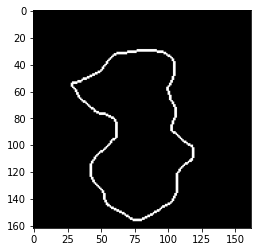

In [37]:
# Now we can find the pixels that have value 1 in the original mask but not in the eroded mask

perimeter_im = gt - mask_eroded

plt.imshow(perimeter_im, cmap='gray')
A = area
l = np.sum(perimeter_im)
print(A,l)

c = (l**2)/(4*math.pi*A)
print(c)
